In [59]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

In [60]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

In [62]:
from sklearn import datasets

## Data Loading

In [63]:
boston_data = datasets.load_boston()

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [64]:
type(boston_data)

sklearn.utils.Bunch

In [65]:
data_attrs = boston_data.get("data")

In [66]:
target = boston_data.get("target")

In [70]:
x_train, x_test, y_train, y_test = train_test_split(data_attrs, target, test_size=0.20, random_state=42)

In [71]:
print("Train data x shape: ", x_train.shape)
print("Train data y shape: ", y_train.shape)

print("Test data x shape: ", x_test.shape)
print("Test data y shape: ", y_test.shape)

Train data x shape:  (404, 13)
Train data y shape:  (404,)
Test data x shape:  (102, 13)
Test data y shape:  (102,)


In [72]:
x_train_df = pd.DataFrame(x_train, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
                                   "TAX", "PTRATIO", "B", "LSTAT"])
y_train_df = pd.DataFrame(y_train, columns=["MEDV"])
x_test_df = pd.DataFrame(x_test, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
                                   "TAX", "PTRATIO", "B", "LSTAT"])
y_test_df = pd.DataFrame(y_test, columns=["MEDV"])

In [73]:
x_train_df.shape

(404, 13)

In [74]:
y_train_df.shape

(404, 1)

In [75]:
x_test_df.shape

(102, 13)

In [76]:
y_test_df.shape

(102, 1)

In [77]:
x_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
400,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
401,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
402,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [78]:
y_train_df

,MEDV
0,12.0
1,19.9
2,19.4
3,13.4
4,18.2
...,...
399,19.5
400,21.1
401,24.5
402,13.4


### Insights about Statistical Params

In [79]:
x_train_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Checking not null values in each attribute

In [80]:
x_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [81]:
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    404 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


## Correlation Matrix - Check Multi-Colinearity, Target variable correlation

In [83]:
full_data = pd.concat([x_train_df, y_train_df], axis=1)

In [84]:
full_data.corr().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.199,0.400,-0.045,0.396,-0.200,0.334,-0.366,0.616,0.577,0.289,-0.357,0.414,-0.380
ZN,-0.199,1.000,-0.533,-0.044,-0.526,0.275,-0.575,0.682,-0.314,-0.294,-0.389,0.179,-0.397,0.310
INDUS,0.400,-0.533,1.000,0.095,0.771,-0.399,0.637,-0.708,0.589,0.702,0.348,-0.363,0.604,-0.471
CHAS,-0.045,-0.044,0.095,1.000,0.135,0.111,0.096,-0.122,0.029,0.008,-0.113,0.042,-0.071,0.191
NOX,0.396,-0.526,0.771,0.135,1.000,-0.300,0.720,-0.772,0.589,0.650,0.161,-0.368,0.594,-0.416
RM,-0.200,0.275,-0.399,0.111,-0.300,1.000,-0.211,0.198,-0.200,-0.281,-0.343,0.113,-0.613,0.711
AGE,0.334,-0.575,0.637,0.096,0.720,-0.211,1.000,-0.757,0.430,0.472,0.241,-0.265,0.571,-0.340
DIS,-0.366,0.682,-0.708,-0.122,-0.772,0.198,-0.757,1.000,-0.483,-0.524,-0.218,0.291,-0.495,0.235
RAD,0.616,-0.314,0.589,0.029,0.589,-0.200,0.430,-0.483,1.000,0.913,0.472,-0.439,0.480,-0.387
TAX,0.577,-0.294,0.702,0.008,0.650,-0.281,0.472,-0.524,0.913,1.000,0.445,-0.442,0.531,-0.460


## Check Feature importance using Tree Classifier

In [85]:
X = x_train_df #independent columns
y = np.round(y_train_df) #target column i.e price range

In [89]:
y

,MEDV
0,12.0
1,20.0
2,19.0
3,13.0
4,18.0
...,...
399,20.0
400,21.0
401,24.0
402,13.0


In [95]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
#y = np.round(df['MEDV'])
model.fit(X,y)

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


ExtraTreesClassifier()

In [92]:
print(model.feature_importances_) 

[0.11485785 0.02284457 0.04196854 0.01547769 0.06987964 0.13691448
 0.12082006 0.10237641 0.03784904 0.04452212 0.04760665 0.10828725
 0.13659569]


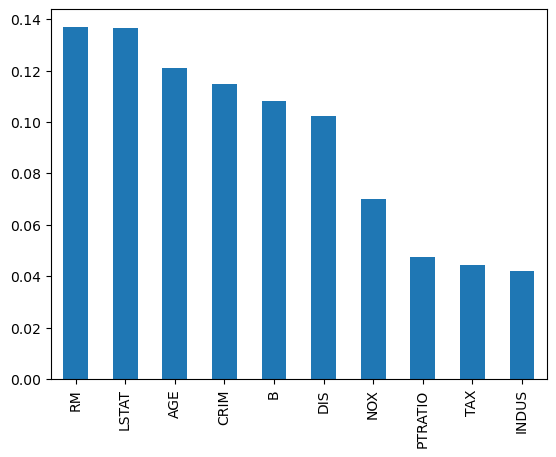

In [93]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

## Linear Regression for Prediction

In [96]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [99]:
linear_model = LinearRegression().fit(x_train_df, y_train_df)
linear_model.score(x_train_df, y_train_df)

0.7508856358979673

In [101]:
y_pred = linear_model.predict(x_train_df)

## Relationship explained by Linear Regression Training

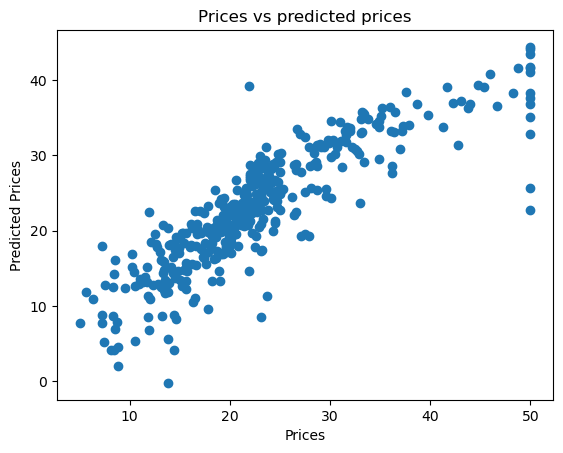

In [102]:
plt.scatter(y_train_df, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs predicted prices")
plt.show()

In [103]:
y_test_pred = linear_model.predict(x_test_df)

In [104]:
linear_model.score(x_test_df, y_test_df)

0.6687594935356329

In [105]:
X = x_train_df[["LSTAT", "RM", "AGE", "CRIM"]]

In [106]:
linear_model = LinearRegression().fit(X, y)
linear_model.score(X, y)

0.6646517369360949

## XGBoost For Prediction

In [107]:
import xgboost as xg

from sklearn.metrics import mean_squared_error as MSE

xgb_model = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_model.fit(x_train_df, y_train_df)
  
# Predict the model
xg_boost_test_pred = xgb_model.predict(x_test_df)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test_df, xg_boost_test_pred))
print("RMSE : % f" %(rmse))

RMSE :  3.196418


In [108]:
xg_boost_train_pred = xgb_model.predict(x_train_df)

In [109]:
import joblib
joblib.dump(xgb_model, "./xgboost_model_v2.joblib")

['./xgboost_model_v2.joblib']

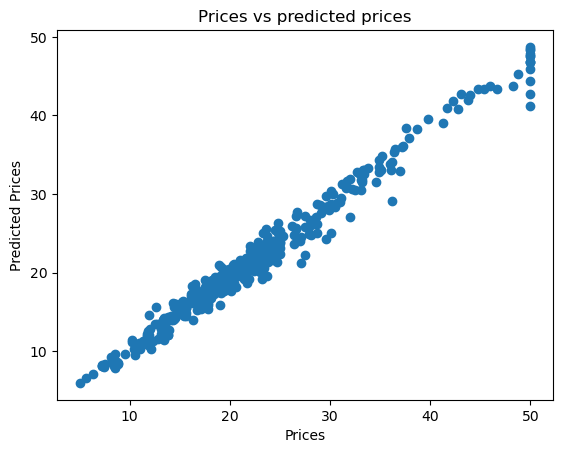

In [110]:
plt.scatter(y_train_df, xg_boost_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs predicted prices")
plt.show()

In [111]:
from sklearn.metrics import explained_variance_score
predictions = xgb_model.predict(x_test_df)

print("Train accuracy: ", explained_variance_score(xg_boost_train_pred,y_train_df))
print("Test Accuracy: ", explained_variance_score(predictions,y_test_df))

Train accuracy:  0.9700117956671834
Test Accuracy:  0.8210225439368644


In [112]:
train_dmatrix = xg.DMatrix(data = x_train_df, label = y_train_df)
test_dmatrix = xg.DMatrix(data = x_test_df, label = y_test_df)
  
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:squarederror"}
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test_df, pred))
print("RMSE : % f" %(rmse))

RMSE :  5.600191


In [113]:
train_pred = xgb_r.predict(train_dmatrix)

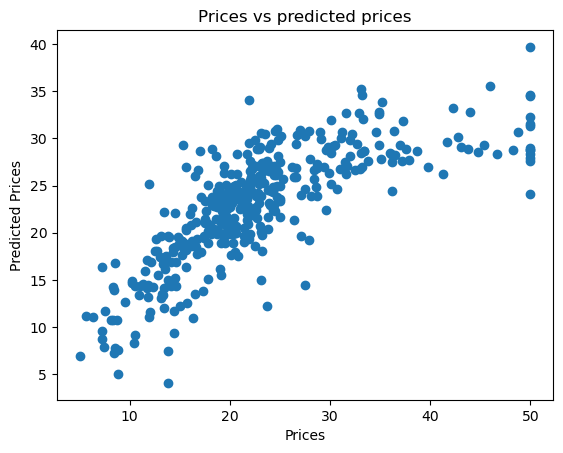

In [114]:
plt.scatter(y_train_df, train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs predicted prices")
plt.show()

## Random Forest

In [115]:

rand_forest_model = RandomForestRegressor()
rand_forest_model.fit(x_train_df, y_train_df)

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [116]:
# Use the forest's predict method on the test data
predictions = rand_forest_model.predict(x_train_df)
# Calculate the absolute errors

print("Train accuracy: ", rand_forest_model.score(x_train_df, y_train_df)*100)

Train accuracy:  97.96796106094942


In [117]:
print("Test accuracy: ", rand_forest_model.score(x_test_df, y_test_df)*100)

Test accuracy:  89.07559612798852


[12:09:35] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


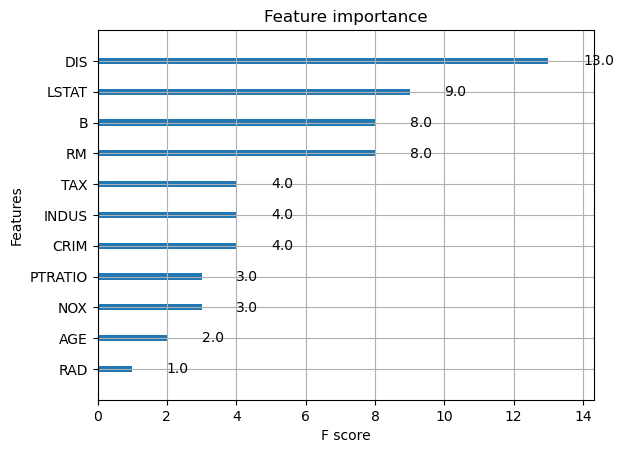

In [118]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
data_dmatrix = xg.DMatrix(data=x_train_df,label=y_train_df)
xg_reg = xg.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

xg.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

### Hyper Parameter Tuning for Random Forest Regressor

In [119]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(x_train_df, y_train_df)
m_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 1670,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'bootstrap': False}

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models

[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, n_estimators=340; total time=   1.2s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=4, n_estimators=1580; total time=   5.9s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=1480; total time=   8.0s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1420; total time=   4.6s
[CV] END bootstrap=False, max_features=log2, min_samples_leaf=4, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_features=log2, min_samples_leaf=4, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=1830; total time=   6.0s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, n_estimators=840; total time=   3.1s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=4, n_estimators=980; total time=   2.6s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, n_estimators=1420; 

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models

[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, n_estimators=340; total time=   1.3s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=2, n_estimators=1100; total time=   3.3s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=2, n_estimators=1100; total time=   4.9s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=1480; total time=   7.9s
[CV] END bootstrap=True, max_features=log2, min_samples_leaf=2, n_estimators=1250; total time=   5.4s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=1830; total time=   5.4s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, n_estimators=840; total time=   3.1s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=4, n_estimators=980; total time=   2.6s
[CV] END bootstrap=False, max_features=log2, min_samples_leaf=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, max_features=log2, min_samples_leaf=2, n_estimators=400; 

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models

[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=4, n_estimators=1580; total time=   5.1s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=2, n_estimators=1100; total time=   4.7s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1420; total time=   3.9s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1420; total time=   4.5s
[CV] END bootstrap=True, max_features=log2, min_samples_leaf=2, n_estimators=1250; total time=   5.4s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=4, n_estimators=740; total time=   2.4s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=4, n_estimators=740; total time=   2.6s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, n_estimators=840; total time=   3.1s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, n_estimators=1420; total time=   4.6s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, n_estimators=280; tota

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Neetika/opt/anaconda3/envs/ml_models

In [121]:
m_random.best_params_

{'n_estimators': 1670,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'bootstrap': False}

In [123]:
#on best estimates
rand_forest_model = RandomForestRegressor(n_estimators=790,
 min_samples_leaf=1,
 max_features='sqrt',
 bootstrap=False)
rand_forest_model.fit(x_train_df, y_train_df)

predictions = rand_forest_model.predict(x_train_df)
# Calculate the absolute errors

print("Train accuracy: ", rand_forest_model.score(x_train_df, y_train_df)*100)
print("Test accuracy: ", rand_forest_model.score(x_test_df, y_test_df)*100)

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train accuracy:  99.99999960342765
Test accuracy:  87.4561507647668


In [126]:
#on best estimates
rand_forest_model = RandomForestRegressor(n_estimators=1670,
 min_samples_leaf=1,
 max_features='sqrt',
 bootstrap=False)
rand_forest_model.fit(x_train_df, y_train_df)

predictions = rand_forest_model.predict(x_train_df)
# Calculate the absolute errors

print("Train accuracy: ", rand_forest_model.score(x_train_df, y_train_df)*100)
print("Test accuracy: ", rand_forest_model.score(x_test_df, y_test_df)*100)

/Users/Neetika/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train accuracy:  99.99999980893246
Test accuracy:  88.28131318223109


In [124]:
#Save best model
import joblib
joblib.dump(rand_forest_model, "./random_forest_v2.joblib")

['./random_forest_v2.joblib']

In [58]:
import pickle
pickle.dump(rand_forest_model, open('random_forest.pkl', 'wb'))

In [125]:
loaded_model = joblib.load("/Users/Neetika/Documents/neetika/code/random_forest.joblib")

print("Test accuracy with loaded model: ", loaded_model.score(x_test_df, y_test_df)*100)

Test accuracy with loaded model:  98.60778056293023
